In [1]:
#инициализация изображения
from PIL import Image

pil_im = Image.open('moth.jpg')

#массив изображений

filelist = []
filelist.append('.\moth.jpg')


In [2]:
from PIL import Image
import os

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".png"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)#инициализация изображения и последующее сохранение с другим разрешением из outfile
        except IOError:
            print ("cannot convert", infile)


In [3]:
pil_im.thumbnail((128,128))#создание картинки 128х128

In [4]:
#обрезка изображения
box = (100,100,400,400)
region = pil_im.crop(box)
#всатвка вырезанной области

region = region.transpose(Image.ROTATE_180) 
pil_im.paste(region,box)

#изменение размера изображения и поворот
out = pil_im.resize((128,128))
out = pil_im.rotate(45)

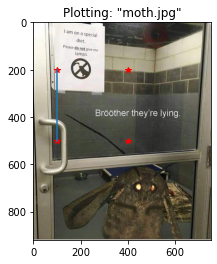

In [5]:
from PIL import Image
from pylab import *

# считать изображение в массив
im = array(Image.open('moth.jpg'))

# поместить на график изображение
imshow(im)

# пара точек
x = [100,100,400,400]
y = [200,500,200,500]

# нанести точки как красные звездочки
plot(x,y,'r*')

# нарисовать отрезок, который соединяет первые 2 точки
plot(x[:2],y[:2])

# Добавить заголовок и показать график
title('Plotting: "moth.jpg"') 
show()


(0.5, 749.5, 0.5, 919.5)

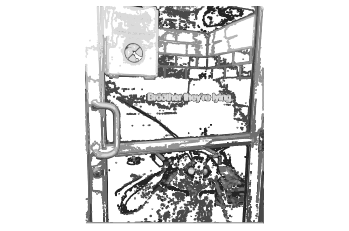

In [6]:
from PIL import Image
from pylab import *

# считать изображение в массив
im = array(Image.open('moth.jpg').convert('L'))

# создать новое изображение
figure()
# ч/б
gray()
# показать изолинии относительно левого верхнего угла
contour(im, origin='image') 
axis('equal')
axis('off')


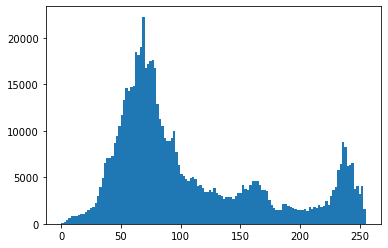

In [7]:
#создание гистограммы
figure()
hist(im.flatten(), 128)
show()

Please click 3 points


<ipython-input-8-6c9e18a44fa2>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  x = ginput(3)


you clicked: []


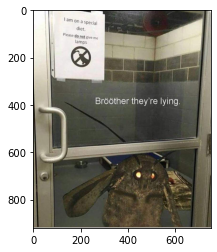

In [8]:
from PIL import Image
from pylab import *

im = array(Image.open('moth.jpg'))
imshow(im)
print ('Please click 3 points' )
x = ginput(3)
print ('you clicked:', x )
show()


In [9]:
#создали массив numpy 
im = array(Image.open('moth.jpg'))
print (im.shape, im.dtype,'   количество строк, столбцов, цветовых каналов')

im = array(Image.open('moth.jpg').convert('L'),'f')
print (im.shape, im.dtype, '     тип данных, которые хранятся в элементах массива')


(920, 750, 3) uint8    количество строк, столбцов, цветовых каналов
(920, 750) float32      тип данных, которые хранятся в элементах массива


0 255


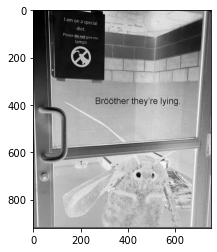

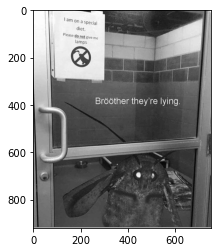

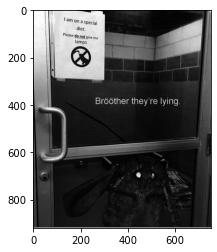

In [20]:
from PIL import Image
from numpy import *

im = array(Image.open('moth.jpg').convert('L')) 

im2 = 255 - im #инвертируем яркость (белое= черное, черное = белое)

im3 = (100.0/255) * im + 100 #привести к интервалу 100...200

im4 = 255.0 * (im/255.0)**2 #возвести в квадрат

print (int(im.min()), int(im.max()))

pil_im = Image.fromarray(uint8(im))

figure()
imshow(im2)
figure()
imshow(im3)
figure()
imshow(im4)
show()


In [14]:
# save mean and principal components
import pickle
with open('font_pca_modes.pkl', 'wb') as f:
    pickle.dump(im, f) 
    pickle.dump(im2, f)
    f.close()

# load mean and principal components 
with open('font_pca_modes.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)
    f.close()



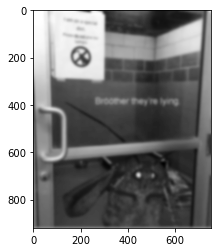

In [21]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('moth.jpg').convert('L')) 
im2 = filters.gaussian_filter(im,5)
imshow(im2)
show()

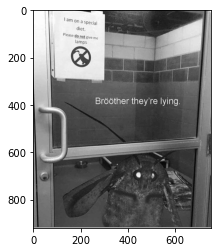

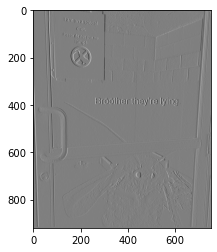

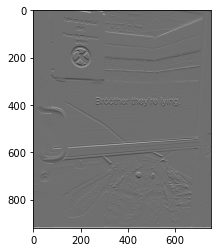

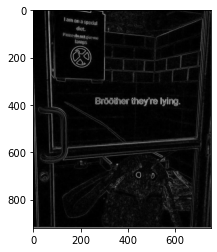

In [24]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('moth.jpg').convert('L'))

#Операторы Собеля
imx = zeros(im.shape)
filters.sobel(im,1,imx)

imy = zeros(im.shape)
filters.sobel(im,0,imy)


magnitude = sqrt(imx**2+imy**2)

figure()
imshow(im)
figure()
imshow(imx)
figure()
imshow(imy)
figure()
imshow(magnitude)
show()

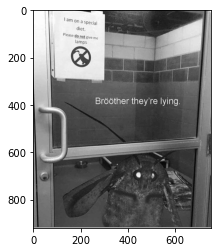

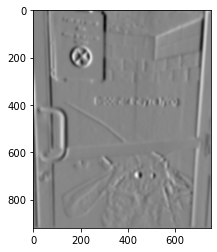

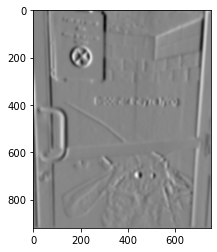

In [25]:

im = array(Image.open('moth.jpg').convert('L'))

sigma = 5

imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imy)

figure()
imshow(im)
figure()
imshow(imx)
figure()
imshow(imy)
show()